In [592]:
import tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tensorflow.__version__)

2.6.0


## Preprocessing

In [593]:
data_path = '/aiffel/aiffel/transformer_chatbot/data/ChatbotData .csv'
df = pd.read_csv(data_path)
df.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [594]:
print('data:', len(df))
print(df.isnull().sum())

data: 11823
Q        0
A        0
label    0
dtype: int64


In [595]:
def preprocess_sentence(data,column=None):
    res = []
    if column:
        for sentence in data[column]:
            sentence =  sentence.lower().strip() # 소문자로 변경후 양쪽 공백 제거
            sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # 특수문자와 분리
            sentence = re.sub(r'[" "]+', " ", sentence) # 공백 한칸으로 조정
            sentence = re.sub(r"[^^가-힣a-zA-Z0-9\s.?!,]+", " ", sentence) #필요없는 문자들은 ' '로 대체, Korean
            sentence = sentence.strip()
            res.append(sentence)
    else:
        sentence =  data.lower().strip() 
        sentence = re.sub(r"([?.!,])", r" \1 ", sentence) 
        sentence = re.sub(r'[" "]+', " ", sentence) 
        sentence = re.sub(r"[^^가-힣a-zA-Z0-9\s.?!,]+", " ", sentence) 
        res = sentence.strip()
    return res

In [596]:
questions = preprocess_sentence(df, 'Q')
answers = preprocess_sentence(df, 'A')

In [597]:
print(len(questions), len(answers))

11823 11823


In [598]:
# SubwordTextEncoder Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
VOCAB_SIZE = tokenizer.vocab_size + 2

In [599]:
VOCAB_SIZE

8166

In [600]:
print('정수 인코딩 전의 21번째 질문 샘플: {}'.format(questions[21]))
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 디코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.decode(tokenizer.encode(questions[21]))))

정수 인코딩 전의 21번째 질문 샘플: 가스비 장난 아님
정수 인코딩 후의 21번째 질문 샘플: [5756, 610, 2487, 4158]
정수 디코딩 후의 21번째 질문 샘플: 가스비 장난 아님


In [601]:
df['Qlength'] = df['Q'].apply(len)
df['Alength'] = df['A'].apply(len)
print(max(df['Qlength']), max(df['Alength']))

56 76


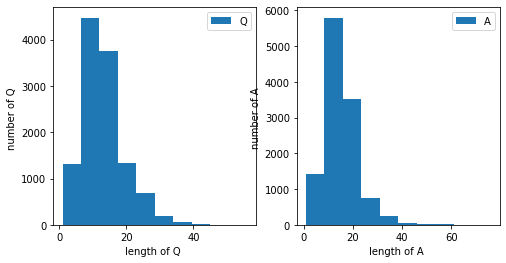

In [602]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].hist(df['Qlength'], bins = 10, label='Q')
ax[0].set_xlabel('length of Q ')
ax[0].set_ylabel('number of Q ')
ax[0].legend()

ax[1].hist(df['Alength'], bins = 10, label='A')
ax[1].set_xlabel('length of A ')
ax[1].set_ylabel('number of A ')
ax[1].legend()

plt.show()

In [603]:
MAX_LENGTH = 50 # 설정 기준 ? 

In [604]:
questions

['12시 땡 !',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'ppl 심하네',
 'sd카드 망가졌어',
 'sd카드 안돼',
 'sns 맞팔 왜 안하지',
 'sns 시간낭비인 거 아는데 매일 하는 중',
 'sns 시간낭비인데 자꾸 보게됨',
 'sns보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다 .',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까 ?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지 ?',
 '가족 있어 ?',
 '가족관계 알려 줘',
 '가족끼리 여행간다 .',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지 ?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야 ?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까 ?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까 ?',
 '감 말랭이 먹고 싶다 .',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑

In [605]:
len(questions[0])

7

In [606]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 50 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 50으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs 

In [607]:
questions, answers = tokenize_and_filter(questions, answers)

In [608]:
questions

array([[8164, 7902, 4198, ...,    0,    0,    0],
       [8164, 7957,   47, ...,    0,    0,    0],
       [8164, 7959, 1433, ...,    0,    0,    0],
       ...,
       [8164, 8145, 8065, ...,    0,    0,    0],
       [8164,  134,  166, ...,    0,    0,    0],
       [8164, 1951,  881, ...,    0,    0,    0]], dtype=int32)

In [609]:
print('단어장의 크기 :',(VOCAB_SIZE))# 50개 이하로 잘라도 Vocab에 변화는 없음 (vocab다양성에 상관x)
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8166
필터링 후의 질문 샘플 개수: 11823
필터링 후의 답변 샘플 개수: 11823


In [616]:
# Q. shuffle로 인해 cache의 locality가 깨지면

In [617]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [618]:
dataset

<PrefetchDataset shapes: ({inputs: (None, 50), dec_inputs: (None, 49)}, {outputs: (None, 49)}), types: ({inputs: tf.int32, dec_inputs: tf.int32}, {outputs: tf.int32})>

## Model modules

In [619]:
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model) #문장 길이(토큰 개수)임베딩 차원(단어 벡터 차원)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        # 각도 배열 생성
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2]) # 0::2는 열 인덱스에서 0번부터 시작해서 2씩 건너뛰며 
        # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...] # tf.newaxis는 텐서의 첫 번째 차원에 새로운 축을 추가
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [620]:
def scaled_dot_product_attention(query, key, value, mask):
    # 어텐션 가중치는 Q와 K의 닷 프로덕트
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 가중치를 정규화
    depth = tf.cast(tf.shape(key)[-1], tf.float32) #tf.cast는 텐서의 데이터 타입을 변경하는 함수
    logits = matmul_qk / tf.math.sqrt(depth)

    # 패딩에 마스크 추가
    if mask is not None:
        logits += (mask * -1e9)

    # softmax적용
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # 최종 어텐션은 가중치와 V의 닷 프로덕트
    output = tf.matmul(attention_weights, value)
    return output

In [621]:
# (0)을 찾아서, 해당 위치에 마스크를 생성
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # tf.newaxis를 사용하여 (batch_size, 1, 1, sequence length)형태로 변경합니다. (마스크 적용을 위함)
    return mask[:, tf.newaxis, tf.newaxis, :]

# 미래 토큰을 가리는 마스크
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1] # x 텐서의 시퀀스 길이(두 번째 차원)를 seq_len 변수에 저장합니다.
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x) # create_padding_mask 함수를 사용하여 padding mask를 생성합니다.
    return tf.maximum(look_ahead_mask, padding_mask)

In [622]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)
        self.dense = tf.keras.layers.Dense(units=d_model) # 단어 벡터는 attention 계산에 더 적합한 형태?

    # 각 헤드는 서로 다른 의미나 관계를 학습
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(inputs, shape=(batch_size, -1, self.num_heads, self.depth))  # (batch_size, seq_len, d_model) -> (batch_size, seq_len, num_heads, depth)
        return tf.transpose(inputs, perm=[0, 2, 1, 3]) # (batch_size, num_heads, seq_len, depth)

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, V에 각각 Dense를 적용합니다
        # normal embedding: (batch_size, seq_len, embedding_dim)
        # attention required: d_model이 num_heads * depth
        # Thus, Dense를 사용해 차원을 (batch_size, seq_len, d_model)로 맞춤
        query = self.query_dense(query)
        key = self.query_dense(key) 
        value = self.query_dense(value )
        
#         print(f'shape of query:{query.shape}, shape of key:{key.shape}, shape of value:{value.shape}')
        #shape of query:(None, None, 128), shape of key:(None, None, 128), shape of value:(None, None, 128)
        query = self.split_heads(query, batch_size)  # (batch_size, seq_len, d_model)
        key = self.split_heads(key, batch_size)
        value =self.split_heads(value, batch_size) 
        
        #TODO: 찍어보기
#         print(f'shape of query:{query.shape}, shape of key:{key.shape}, shape of value:{value.shape}')
        #shape of query:(None, 8, None, 16), shape of key:(None, 8, None, 16), shape of value:(None, 8, None, 16) 

        scaled_attention = scaled_dot_product_attention(query, key, value, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
        concat_attention = tf.reshape(scaled_attention,(batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 한 번 더 적용합니다
        # 여러 Head의 결과를 이어붙이면 차원이 d_model보다 큼.
        # Dense 레이어를 통해 
        # (batch_size, seq_len, num_heads * depth) -> (batch_size, seq_len, d_model)로 차원을 복구
        outputs = self.dense(concat_attention)

        return outputs

## Model Structure

In [623]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs") # None: sequence_length는 모델 학습 시 유동적으로 변할 수 있음을 의미합니다.
  
  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask") # 1: 패딩 마스크는 각 문장에 대해 하나씩 생성되므로, 두 개의 차원은 1입니다.


  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)


# '''
# Dense는 각 헤드 정보 통합
# '''
  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [624]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [625]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)

    # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],outputs=outputs,name=name)

In [626]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')

    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],outputs=outputs,name=name)

## Train

In [627]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
                              create_padding_mask, output_shape=(1, 1, None),
                              name='enc_padding_mask')(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
                              create_look_ahead_mask,
                              output_shape=(1, None, None),
                              name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
                              create_padding_mask, output_shape=(1, 1, None),
                              name='dec_padding_mask')(inputs)

    # 인코더
    enc_outputs = encoder(
                  vocab_size=vocab_size,
                  num_layers=num_layers,
                  units=units,
                  d_model=d_model,
                  num_heads=num_heads,
                  dropout=dropout,
                )(inputs=[inputs, enc_padding_mask])

    # 디코더
    dec_outputs = decoder(
                  vocab_size=vocab_size,
                  num_layers=num_layers,
                  units=units,
                  d_model=d_model,
                  num_heads=num_heads,
                  dropout=dropout,
                )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)
    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [628]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
            vocab_size=VOCAB_SIZE,
            num_layers=NUM_LAYERS,
            units=UNITS,
            d_model=D_MODEL,
            num_heads=NUM_HEADS,
            dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    2881536     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [629]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')(y_true, y_pred)
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [630]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [631]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [632]:
EPOCHS = 30
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/30
185/185 [==============================] - 19s 67ms/step - loss: 1.1560 - accuracy: 0.0258
Epoch 2/30
185/185 [==============================] - 12s 67ms/step - loss: 0.9352 - accuracy: 0.0395
Epoch 3/30
185/185 [==============================] - 12s 67ms/step - loss: 0.7937 - accuracy: 0.0407
Epoch 4/30
185/185 [==============================] - 13s 68ms/step - loss: 0.7301 - accuracy: 0.0439
Epoch 5/30
185/185 [==============================] - 13s 68ms/step - loss: 0.6822 - accuracy: 0.0465
Epoch 6/30
185/185 [==============================] - 13s 68ms/step - loss: 0.6327 - accuracy: 0.0502
Epoch 7/30
185/185 [==============================] - 13s 68ms/step - loss: 0.5821 - accuracy: 0.0546
Epoch 8/30
185/185 [==============================] - 13s 68ms/step - loss: 0.5295 - accuracy: 0.0601
Epoch 9/30
185/185 [==============================] - 13s 68ms/step - loss: 0.4749 - accuracy: 0.0655
Epoch 10/30
185/185 [==============================] - 13s 68ms/step - loss: 0.419

## Inference

In [634]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)

In [635]:
def sentence_generation(sentence):
    # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

    # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

In [638]:
sentence_generation('언제?')

입력 : 언제?
출력 : 언제부터인지 모르게 .


'언제부터인지 모르게 .'

In [250]:
sentence_generation('너야?')

입력 : 너야?
출력 : 네


'네'

In [56]:
sentence_generation('넌 어때?')

입력 : 넌 어때?
출력 : 당신도 예뻐요 .


'당신도 예뻐요 .'

### Test with different HP

In [640]:
# '''
# # 하이퍼파라미터 Epoch 30
# NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
# D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
# NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
# UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
# DROPOUT = 0.1 # 드롭아웃의 비율
# '''

In [644]:
model_size = get_model_size(model)
print(f"dense model has size={model_size/MiB:.2f} MiB")

dense model has size=31.00 MiB


In [141]:
# '''
# # 하이퍼파라미터 Epoch 30
# NUM_LAYERS = 6# 인코더와 디코더의 층의 개수
# D_MODEL = 512 # 인코더와 디코더 내부의 입, 출력의 고정 차원
# NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
# UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
# DROPOUT = 0.1 # 드롭아웃의 비율
# '''

In [286]:
print(f"dense model has accuracy={model_accuracy:.2f}%")
print(f"dense model has size={model_size/MiB:.2f} MiB")

dense model has accuracy=0.11%
dense model has size=108.11 MiB


In [288]:
output = answer("씨끄러워")

Input: [[8163 1229 7655 8164]]
Output: 전한 얽해보세요   


In [289]:
output = answer("운동하자")

Input: [[8163 1641  147 8164]]
Output: 저도 영화 보여주세요   


In [290]:
output = answer("너 누구야")

Input: [[8163  878 7559 8164]]
Output: 저는 도움이 되고 싶어요


In [291]:
output = answer('싫어')

Input: [[8163  238 8164]]
Output: 가지마요   


In [ ]:
# '''
# # 하이퍼파라미터 Epoch 100
# NUM_LAYERS = 6# 인코더와 디코더의 층의 개수
# D_MODEL = 512 # 인코더와 디코더 내부의 입, 출력의 고정 차원
# NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
# UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
# DROPOUT = 0.1 # 드롭아웃의 비율
# '''

In [356]:
output = answer('싫어')

Input: [[8163  238 8164]]
Output: 싫어하지 말아요   


In [358]:
output = answer("운동하자")

Input: [[8163 1641  147 8164]]
Output: 오늘 강추위래요   


In [359]:
output = answer("씨끄러워")

Input: [[8163 1229 7655 8164]]
Output: 오늘은 예능이요   


In [371]:
output = answer('12시 ! 땡')

Input: [[8163 7903  239   38 3052 8164]]
Output: 하루가 또 함께 있는 조별로에요   


Summary:  
1. 작은모델에서 답변이 부족하다
2. 모델크기를 늘렸을때 같은 에폭에서 더 이상한 답변을 내놓는다. 
3. 모델크기를 늘렸을때에는, epochs수를 더 늘려서 성능을 올릴 수 있다. 


### Attention Visualisation

In [645]:
for layer in model.get_layer('encoder').layers:
    print(layer.name, layer.__class__.__name__)

inputs InputLayer
embedding Embedding
tf.math.multiply TFOpLambda
positional_encoding PositionalEncoding
dropout Dropout
padding_mask InputLayer
encoder_layer_0 Functional
encoder_layer_1 Functional


In [144]:
# Issue report (https://github.com/keras-team/tf-keras/issues/206)

# How to convert KerasTensor to numpy array or TensorFlow EagerTensor? #206
# -> The Keras Tensor cannot be converted to a Numpy array directly, You can please try to convert the Keras tensor to Tensor and from the Tensor you can convert to the numpy.

Issue:

1. attention weights 시각화를 위해 Keras tensor에서의 값을 numpy변환할때에는, 직접변환이 불가능하며 tensor로 먼저 변환후 numpy변환해야 한다.
2. weights 확인시 lookup head mask 처리를 해주어야한다.